In [13]:
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regularization"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Saving figure ridge_regression_plot


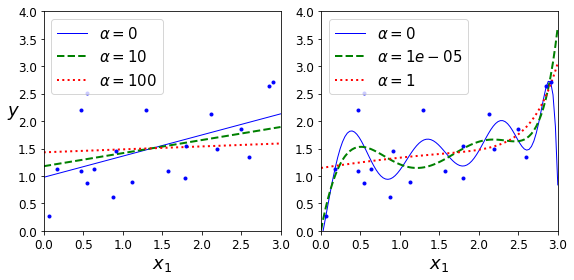

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

[[1.12362036]
 [2.85214292]
 [2.19598183]]
[[1.00587012]
 [2.58552255]
 [2.23751156]]
[0.01573755] [[0.93680013]]


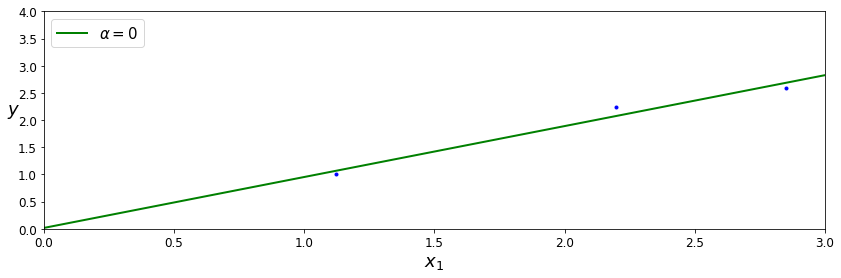

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

f = [[1.0, 2.0, 3.0]]
np.random.seed(42)
m = 3
X = 3 * np.random.rand(m, 1)
print(X)

y = 1 + 0.5 * X + np.random.randn(m, 1) / 2
print(y)
X_new = np.linspace(0, 3, 100).reshape(100, 1)

alpha = 0

plt.figure(figsize=(14,4))

model = Ridge(alpha)
model.fit(X, y)
print(model.intercept_, model.coef_)

y_new_regul = model.predict(X_new)

plt.plot(X_new, y_new_regul, "g-", linewidth=2, label=r"$\alpha = {}$".format(alpha))
 
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 3, 0, 4])

plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()